In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("../csv/steam.csv")
rdf = pd.read_csv('../csv/steam_top_100.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'steam.csv'

In [74]:
df.shape[0]

27075

In [6]:
df.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [14]:
df2 = df.sort_values('release_date',ascending=False)


In [105]:
mask = df['release_date'] > '2014-01-01'

In [106]:
df3 = df2.loc[mask]
df3

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
23726,905370,Conqueror's Blade,2019-05-01,1,Booming Games,My.com,windows,0,Online Multi-Player;MMO;Online Co-op;In-App Pu...,Action;Free to Play;Massively Multiplayer;RPG;...,Action;Strategy;RPG,0,259,235,0,0,0-20000,11.39
24430,931690,Himno,2019-04-26,1,David Moralejo Sánchez,GrabTheGames,windows,0,Single-player;Steam Achievements;Partial Contr...,Adventure;Casual;Free to Play;Indie,Indie;Casual;Free to Play,11,163,30,0,0,20000-50000,0.00
18100,735660,Steamcraft,2019-04-25,1,Last Level;SOFF Games,Last Level,windows,0,Multi-player;Online Multi-Player;MMO;Online Co...,Action;Massively Multiplayer;Racing,Massively Multiplayer;Action;Racing,72,56,24,0,0,0-20000,12.99
25966,995050,Havocado,2019-04-25,1,Webble Games,Webble Games,windows;mac,0,Multi-player;Online Multi-Player;Local Multi-P...,Action;Indie;Early Access,Early Access;Action;Indie,0,9,3,0,0,0-20000,7.19
17526,718590,Dark Devotion,2019-04-25,1,Hibernian Workshop,The Arcade Crew;Maple Whispering Limited,windows,16,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie;RPG,Action;Indie;Adventure,45,186,78,0,0,0-20000,17.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,264320,Captain Morgane and the Golden Turtle,2014-01-03,1,WizarBox,Reef Entertainment,windows,0,Single-player,Adventure;Casual,Adventure;Casual;Point & Click,0,83,53,0,0,20000-50000,3.99
2271,263680,Unearthed: Trail of Ibn Battuta - Episode 1 - ...,2014-01-03,1,Semaphore,Semaphore,windows;mac,0,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie,Adventure;Action;Indie,7,414,366,0,0,20000-50000,3.99
2257,263340,Continue?9876543210,2014-01-03,1,Jason Oda,Jason Oda,windows;mac;linux,0,Single-player;Partial Controller Support,Action;Adventure;Indie,Indie;Adventure;Action,0,97,72,0,0,20000-50000,6.99
2259,263380,Driftmoon,2014-01-03,1,Ville Mönkkönen;Anne Mönkkönen,Instant Kingdom,windows,0,Single-player;Steam Achievements;Includes leve...,Adventure;Indie;RPG,RPG;Adventure;Indie,9,192,21,0,0,20000-50000,11.39


In [113]:
yearly = df3.groupby('release_date').size()
yearly.loc['release_data']> '2014-01-01' & 


release_date
2014-01-03     5
2014-01-06     3
2014-01-08     3
2014-01-09     2
2014-01-10     6
              ..
2019-04-23    18
2019-04-24    20
2019-04-25     9
2019-04-26     1
2019-05-01     1
Length: 1682, dtype: int64

In [116]:
# 영어 지원 유무 비율

([<matplotlib.axis.XTick at 0x197695c3730>,
 [Text(0, 0, ''), Text(0, 0, '')])

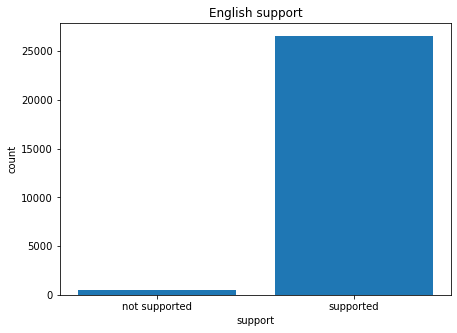

In [111]:
# english_dict = dict(df.english.value_counts())
# english_dict
eng = df.groupby('english').size()
x = ['not supported','supported']
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(x,eng)
ax.set_title('English support')
ax.set_xlabel('support')
ax.set_ylabel('count')
plt.xticks([0,1])

In [ ]:
# hover하면 비율이 나오도록 하기.

In [78]:
print(round(eng[0]/df.shape[0]*100),"%")

2 %


In [79]:
print(round(eng[1]/df.shape[0]*100),"%")

98 %


In [114]:
# 평점 TOP10 게임

In [133]:
df_rating = df.sort_values('positive_ratings',ascending=False).head(10)
df_rating.groupby(['name','positive_ratings']).size()

name                              positive_ratings
Counter-Strike: Global Offensive  2644404             1
Dota 2                            863507              1
Garry's Mod                       363721              1
Grand Theft Auto V                329061              1
Left 4 Dead 2                     251789              1
PAYDAY 2                          308657              1
PLAYERUNKNOWN'S BATTLEGROUNDS     496184              1
Team Fortress 2                   515879              1
Terraria                          255600              1
Unturned                          292574              1
dtype: int64

In [ ]:
# 인기있는(플레이 타임이 긴) TOP10 게임

In [146]:
df_playtime = df.sort_values('average_playtime',ascending=False).head(10)
df_playtime.groupby(['average_playtime','name'],sort=False).size()

average_playtime  name                                  
190625            The Abbey of Crime Extensum               1
95245             The Banner Saga: Factions                 1
95242             The Secret of Tremendous Corporation      1
63481             PRICE                                     1
55204             Boundless                                 1
54618             Shroud of the Avatar: Forsaken Virtues    1
44169             X-Plane 11                                1
43632             懒人修仙传                                     1
43074             Fantasy Grounds                           1
38805             Screeps                                   1
dtype: int64

In [ ]:
# 가격 높은순 TOP10 게임(가격 낮은 것은 0원도 있어서 높은순으로 함)

In [161]:
df_price = df.sort_values('price',ascending=False).head(10)
df_price

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
21105,821800,ADR-Labelling Game,2018-04-12,1,Suomen Kuljetusturva Oy,Suomen Kuljetusturva Oy,windows,0,Single-player,Simulation,Simulation;Difficult,0,1,0,0,0,0-20000,421.99
13062,585610,GameMaker Studio 2 UWP,2017-03-08,1,YoYo Games Ltd.,YoYo Games Ltd.,windows;mac,0,In-App Purchases,Animation & Modeling;Design & Illustration;Edu...,Game Development;Design & Illustration;Utilities,0,1,0,0,0,0-20000,303.99
10034,502570,Houdini Indie,2018-10-10,1,SideFX,SideFX,windows,0,Partial Controller Support;Steam Cloud,Animation & Modeling;Design & Illustration;Gam...,Animation & Modeling;Game Development;3D,0,23,0,0,0,0-20000,209.99
14917,648070,CrisisActionVR,2017-09-11,1,Pixel Wonder,Pixel Wonder,windows,0,Single-player;Multi-player;Online Multi-Player...,Violent;Gore;Action;Adventure;Indie;Massively ...,Massively Multiplayer;Indie;Action,20,14,10,0,0,0-20000,154.99
25568,977200,Bible Test,2018-11-27,1,FIRST_UKRAINIAN,FIRST_UKRAINIAN,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie;Simulation,Indie;Casual;Adventure,5,24,6,0,0,0-20000,154.99
10624,517500,Tactics: Bludgeons Blessing,2017-07-04,1,Capt. McCay Soft,Capt. McCay Soft,windows;mac,0,Single-player;Steam Trading Cards,Action;Simulation;Strategy,Strategy;Action;Simulation,0,0,4,0,0,0-20000,154.99
13063,585620,GameMaker Studio 2 Mobile,2017-03-08,1,YoYo Games Ltd.,YoYo Games Ltd.,windows;mac,0,In-App Purchases,Animation & Modeling;Design & Illustration;Edu...,Game Development;Design & Illustration;Utilities,0,13,7,0,0,0-20000,154.99
10910,526310,Silhouette,2016-11-13,1,Apeirogon Games,Apeirogon Games,windows,0,Single-player;Partial Controller Support,Adventure;Indie;Early Access,Early Access;Adventure;Indie,0,13,4,0,0,0-20000,154.99
7992,438450,3DF Zephyr Lite Steam Edition,2016-02-02,1,3Dflow SRL,3Dflow SRL,windows,0,Steam Trading Cards,Animation & Modeling;Design & Illustration;Vid...,Video Production;Design & Illustration;Animati...,0,30,2,0,0,0-20000,154.99
17126,707770,Tactics 2: War,2017-09-22,1,Capt McCay Soft,Capt McCay Soft,windows;mac,0,Single-player,Action;Simulation;Strategy,Strategy;Action;Simulation,0,3,6,0,0,0-20000,154.99


In [ ]:
# 최신작 TOP10 게임

In [157]:
df_release = df.sort_values('release_date',ascending=False).head(10)
df_release

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
23726,905370,Conqueror's Blade,2019-05-01,1,Booming Games,My.com,windows,0,Online Multi-Player;MMO;Online Co-op;In-App Pu...,Action;Free to Play;Massively Multiplayer;RPG;...,Action;Strategy;RPG,0,259,235,0,0,0-20000,11.39
24430,931690,Himno,2019-04-26,1,David Moralejo Sánchez,GrabTheGames,windows,0,Single-player;Steam Achievements;Partial Contr...,Adventure;Casual;Free to Play;Indie,Indie;Casual;Free to Play,11,163,30,0,0,20000-50000,0.00
18100,735660,Steamcraft,2019-04-25,1,Last Level;SOFF Games,Last Level,windows,0,Multi-player;Online Multi-Player;MMO;Online Co...,Action;Massively Multiplayer;Racing,Massively Multiplayer;Action;Racing,72,56,24,0,0,0-20000,12.99
25966,995050,Havocado,2019-04-25,1,Webble Games,Webble Games,windows;mac,0,Multi-player;Online Multi-Player;Local Multi-P...,Action;Indie;Early Access,Early Access;Action;Indie,0,9,3,0,0,0-20000,7.19
17526,718590,Dark Devotion,2019-04-25,1,Hibernian Workshop,The Arcade Crew;Maple Whispering Limited,windows,16,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie;RPG,Action;Indie;Adventure,45,186,78,0,0,0-20000,17.49
19599,778870,KOMMERSANT,2019-04-25,1,EvilCharm Games,EvilCharm Games,windows,0,Single-player,Action;Indie;Racing,Action;Indie;Gore,10,3,0,0,0,0-20000,3.99
27060,1062240,地铁：恐怖末班车,2019-04-25,0,QZQ Studio,"H.P.Y.S,LLC",windows,0,Single-player,Action;Adventure;Indie;RPG,Action;Adventure;RPG,0,0,2,0,0,0-20000,2.09
22522,865250,Phase Shift,2019-04-25,1,DWSK Ltd,DWSK Ltd,windows,0,Single-player;Multi-player;Online Multi-Player...,Casual;Indie;Simulation;Early Access,Early Access;Rhythm;Music,9,36,14,0,0,0-20000,11.99
17103,706990,BLOCKPOST,2019-04-25,1,Skullcap Studios,Skullcap Studios,windows,0,Online Multi-Player;In-App Purchases,Action;Free to Play;Indie,Free to Play;FPS;Action,0,2703,1084,0,0,500000-1000000,0.00
16326,684580,Shoppe Keep 2 - Business and Agriculture RPG S...,2019-04-25,1,Strange Fire,Excalibur Games,windows,0,Single-player;Online Multi-Player;Online Co-op...,Adventure;Indie;RPG;Simulation;Strategy,Simulation;RPG;Adventure,36,566,348,0,0,20000-50000,7.49


In [ ]:
# 요구 연령별 게임

In [22]:
df.sort_values('required_age',ascending=False)
age = df.groupby('required_age')['required_age'].count()
x = age.index
age

required_age
0     26479
3        11
7        12
12       73
16      192
18      308
Name: required_age, dtype: int64

([<matplotlib.axis.XTick at 0x24c40d4f550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

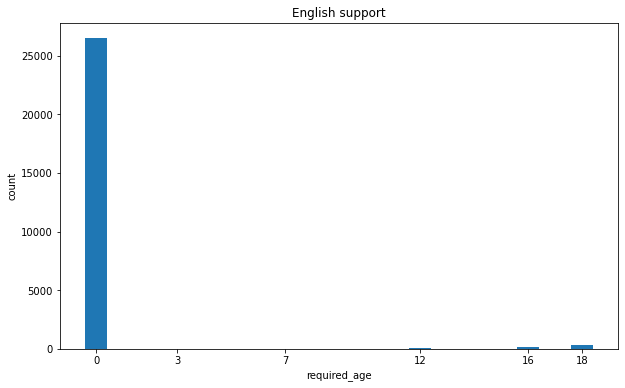

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x,age)
ax.set_title('English support')
ax.set_xlabel('required_age')
ax.set_ylabel('count')
plt.xticks(x)